# Testing out Keras and Tensorflow

In [2]:
import tensorflow as tf
import numpy as np

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.9.0


In [10]:
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [12]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.5105568 ]
 [-0.40384805]
 [-2.4029574 ]], shape=(3, 1), dtype=float32)


In [13]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.8039417 ]
 [0.4186585 ]
 [0.31140542]], shape=(3, 1), dtype=float32)


## Making a modifiable variable in TF

In [29]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.0361467],
       [2.1389387],
       [0.7941249]], dtype=float32)>


In [30]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [31]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

In [43]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(a, b, c, d, e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


## Using Gradient Tape

In [45]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [46]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [48]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(speed, acceleration)

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Custom Basic Neural Network Using TF

Creating two clusters of points with different means and same covariate matrices

In [3]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], 
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

Assign output values of 0 and 1 to samples

In [7]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

Plotting input and target distribution

In [10]:
import matplotlib.pyplot as plt

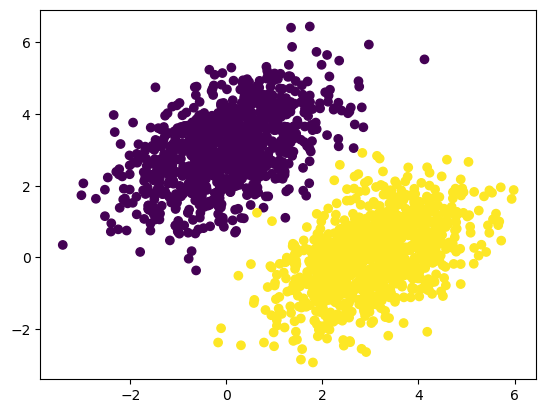

In [11]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])
plt.show()

In [16]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Forward-pass functions

In [15]:
def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [20]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [21]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:0.4f}')

Loss at step 0: 4.1292
Loss at step 1: 0.4521
Loss at step 2: 0.1694
Loss at step 3: 0.1234
Loss at step 4: 0.1104
Loss at step 5: 0.1025
Loss at step 6: 0.0959
Loss at step 7: 0.0899
Loss at step 8: 0.0844
Loss at step 9: 0.0794
Loss at step 10: 0.0748
Loss at step 11: 0.0706
Loss at step 12: 0.0667
Loss at step 13: 0.0632
Loss at step 14: 0.0600
Loss at step 15: 0.0571
Loss at step 16: 0.0544
Loss at step 17: 0.0519
Loss at step 18: 0.0496
Loss at step 19: 0.0476
Loss at step 20: 0.0457
Loss at step 21: 0.0440
Loss at step 22: 0.0424
Loss at step 23: 0.0409
Loss at step 24: 0.0396
Loss at step 25: 0.0384
Loss at step 26: 0.0373
Loss at step 27: 0.0363
Loss at step 28: 0.0354
Loss at step 29: 0.0345
Loss at step 30: 0.0337
Loss at step 31: 0.0330
Loss at step 32: 0.0324
Loss at step 33: 0.0318
Loss at step 34: 0.0312
Loss at step 35: 0.0307
Loss at step 36: 0.0303
Loss at step 37: 0.0299
Loss at step 38: 0.0295
Loss at step 39: 0.0291


In [62]:
preds = np.array(predictions[:, 0] > 0.5)
training_accuracy = np.sum(preds == targets[:, 0]) / preds.size
print(f'Training Accuracy: {training_accuracy * 100}%')

Training Accuracy: 99.75%


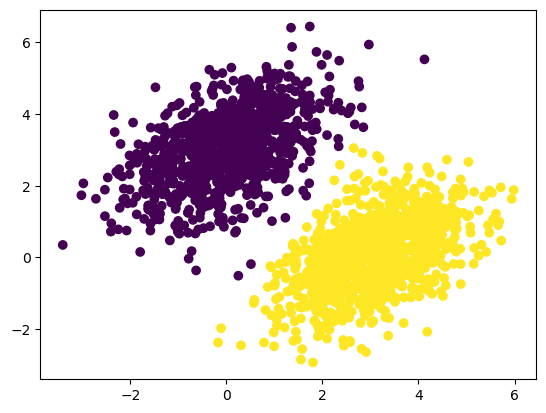

In [83]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

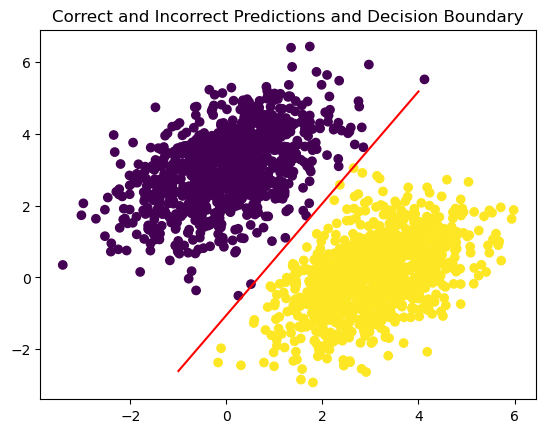

In [87]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.title("Correct and Incorrect Predictions and Decision Boundary")
plt.scatter(inputs[:, 0], inputs[:, 1], c=preds)

## Plotting Correct and Incorrect Classifications

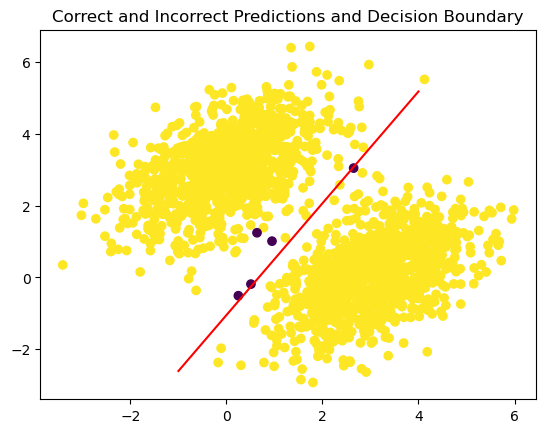

In [85]:
colors = 1*np.array(predictions[:, 0] > 0.5)
correct = preds == targets[:, 0]
colors[incorrect] = 2

x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.title("Correct and Incorrect Predictions and Decision Boundary")
plt.scatter(inputs[:, 0], inputs[:, 1], c=correct)

In [89]:
predictions

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[-0.2254726 ],
       [ 0.18396382],
       [-0.08050725],
       ...,
       [ 1.1796783 ],
       [ 0.85555756],
       [ 1.0865772 ]], dtype=float32)>